# WWW

So I realized that survey questions where buckets or segments are provided are easier to analyse. But what about open ended questions where people could write sentences or paragraphs? So with those questions we need to create those buckets and I used python for that. The current approach is:

1. Load libraries and data file
2. Change column names as needed (whatever makes it easier to process) and drop the ones that are not informative.
3. clean up some missing values by replacing them with a str character (for eg., 'NA').
4. Change entire dataframe to either lowercase or uppercase.
5. start processing one column at a time - change column to desired data type - for open ended this could be just str.
6. Create buckets/segments using replace function and removal of stop words.
7. Find common words in the column.
8. Run another replace/stop word removal if necessary
9. Count the frequencies using value_counts().
10. Move everything to a new excel file and build visualizations. 

**Please note that this is a work in progress and not the final method**.

In [1]:
#Cleaning and pre-proccessing of data

In [2]:
##Import cvs file and pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import textblob
from textblob import TextBlob
xls = pd.ExcelFile('2Q 2021 WWW.xlsx')
df = pd.read_excel(xls)
df = df.copy()

In [3]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
df.head()

The published format which was employed  Remote case number  \
0                       Web: Snap WebHost                   1   
1                       Web: Snap WebHost                   2   
2                       Web: Snap WebHost                   3   
3                       Web: Snap WebHost                   4   
4                       Web: Snap WebHost                   5   

  Language used to conduct the interview  Duration of interview  \
0                          English (USA)                  31.02   
1                          English (USA)                  18.53   
2                          English (USA)                  13.05   
3                          English (USA)                   6.73   
4                          English (USA)                  24.07   

  Remote station name Date of interview  URL ofcalling site      Location  \
0                 100        2021-04-01                 NaN  TUCSON (ASH)   
1                   8        2021-04-02                 NaN      COLUMBIA   
2                   7        2021-04-02                 NaN  GRAND RAPIDS   
3                   8        2021-04-02                 NaN      COLUMBIA   
4                   7        2021-04-02                 NaN  GRAND RAPIDS   

                   SEGMENT PARTS/ SERVICE  ... Service Date Total Spent  \
0  AUTO SAFETY HOUSE (ASH)          PARTS  ...   2021-03-25       23.57   
1              ON-HIGHWAY         SERVICE  ...   2021-03-22     1046.53   
2              ON-HIGHWAY         SERVICE  ...   2021-03-24         207   
3              ON-HIGHWAY         SERVICE  ...   2021-03-19         300   
4              ON-HIGHWAY         SERVICE  ...   2021-03-25      709.66   

   Payment type       RO Type               Description  \
0  Not Provided  Not Provided              Not Provided   
1      Customer     D=DETROIT          On Highway Truck   
2      Customer       O=OTHER  Highway Coach/Motor Home   
3      Customer     D=DETROIT          On Highway Truck   
4      Customer       O=OTHER        Highway Dump Truck   

  Other: (format: "code" - "Mfr Appl Description"; ex: ST21...  \
0                                                          NaN   
1                                                          NaN   
2                                                          NaN   
3                                                          NaN   
4                                                          NaN   

  Was this the right contact? (Did you reach the person who...  \
0                                                          Yes   
1                                                          Yes   
2                                                           No   
3                                                          Yes   
4                                                          Yes   

  On what attempt was the call completed? QUARTER OF COMPLETED SURVEY ISSUE ID  
0                                     2nd                2nd Qtr 2021      NaN  
1                                     1st                2nd Qtr 2021      NaN  
2                                     NaN                2nd Qtr 2021      NaN  
3                                     1st                2nd Qtr 2021      NaN  
4                                     1st                2nd Qtr 2021      NaN  

[5 rows x 47 columns]

In [4]:
df.shape

(673, 47)

In [5]:
df.columns

Index(['The published format which was employed', 'Remote case number',
       'Language used to conduct the interview', 'Duration of interview',
       'Remote station name', 'Date of interview', 'URL ofcalling site',
       'Location', 'SEGMENT', 'PARTS/ SERVICE',
       'Who was the person in {Q2} you dealt with?',
       'Overall Service Experience',
       'Can you give me a reason for giving a rating of {Q6a}?',
       'Did you experience any problems while dealing with our {Q2} ...',
       'What was the nature of the problem?',
       'Was it / were they resolved to your satisfaction?',
       'I can have someone from {Q1} contact you within 24 to 48 hou...',
       'How likely would you recommend them?',
       'Why would you recommend us as a {Q12a}?',
       'Is this the first time you have used the {Q2} location?',
       'How did you hear about them? (DO NOT LIST OFF OPTIONS)', 'Other:',
       '{Q1} knows you have choices when selecting a supplier for yo...',
       'What

In [6]:
#lets drop the first columns about the survey duration etc.
df_new = df.drop(columns =['The published format which was employed', 'Remote case number', 
                           'Language used to conduct the interview', 'Duration of interview',
                           'Remote station name', 'Date of interview', 'URL ofcalling site'])

In [7]:
df_new.columns

Index(['Location', 'SEGMENT', 'PARTS/ SERVICE',
       'Who was the person in {Q2} you dealt with?',
       'Overall Service Experience',
       'Can you give me a reason for giving a rating of {Q6a}?',
       'Did you experience any problems while dealing with our {Q2} ...',
       'What was the nature of the problem?',
       'Was it / were they resolved to your satisfaction?',
       'I can have someone from {Q1} contact you within 24 to 48 hou...',
       'How likely would you recommend them?',
       'Why would you recommend us as a {Q12a}?',
       'Is this the first time you have used the {Q2} location?',
       'How did you hear about them? (DO NOT LIST OFF OPTIONS)', 'Other:',
       '{Q1} knows you have choices when selecting a supplier for yo...',
       'What is your position?', '"Other" Position', 'What is your full name?',
       '{Q1} would also like to include your email address:',
       'What are your biggest on the job challenges during this crisis?',
       'Custome

In [8]:
df_new.shape

(673, 40)

In [9]:
#checking for missing values
df_new.isnull().sum()
df_new.isna().sum()

Location                                                             0
SEGMENT                                                              0
PARTS/ SERVICE                                                       0
Who was the person in {Q2} you dealt with?                           0
Overall Service Experience                                           0
Can you give me a reason for giving a rating of {Q6a}?             568
Did you experience any problems while dealing with our {Q2} ...      0
What was the nature of the problem?                                623
Was it / were they resolved to your satisfaction?                  623
I can have someone from {Q1} contact you within 24 to 48 hou...    623
How likely would you recommend them?                                 1
Why would you recommend us as a {Q12a}?                              0
Is this the first time you have used the {Q2} location?              0
How did you hear about them? (DO NOT LIST OFF OPTIONS)             545
Other:

In [10]:
#Replace missing values with a string value
df_new = df_new.fillna("NA")

In [11]:
#change dataframe to lowercase letters
df_new = df_new.applymap(lambda s:s.lower() if type(s) == str else s)

#  Can you give me a reason for giving a rating of {Q6a}?

In [12]:
#lets analyse 3- First column
df_new['Can you give me a reason for giving a rating of {Q6a}?'] = df_new['Can you give me a reason for giving a rating of {Q6a}?'].astype(str)
df_new['Can you give me a reason for giving a rating of {Q6a}?'].sort_values(ascending = True)

362                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

# Most common words in 'Can you give me a reason for giving a rating of {Q6a}?'

In [13]:
#Find common words - This also tells you the number of times the word appears. Lets start with 3-First column
from collections import Counter
Counter(" ".join(df_new['Can you give me a reason for giving a rating of {Q6a}?']).split()).most_common(1000)

[('na', 568),
 ('the', 152),
 ('they', 92),
 ('i', 77),
 ('and', 73),
 ('to', 69),
 ('was', 68),
 ('it', 62),
 ('a', 50),
 ('we', 43),
 ('that', 28),
 ('for', 28),
 ('not', 25),
 ('on', 23),
 ('were', 22),
 ('in', 21),
 ('had', 21),
 ('of', 21),
 ('got', 18),
 ('get', 18),
 ('what', 17),
 ('did', 17),
 ('me', 17),
 ('with', 16),
 ('but', 14),
 ('be', 14),
 ('have', 13),
 ("didn't", 13),
 ('them', 13),
 ('do', 13),
 ('truck', 13),
 ('us', 12),
 ('took', 11),
 ('there', 11),
 ('when', 11),
 ('my', 10),
 ("wasn't", 10),
 ('work', 10),
 ('called', 10),
 ('back', 10),
 ('out', 10),
 ('are', 10),
 ('parts', 9),
 ('after', 9),
 ('it.', 9),
 ('fix', 9),
 ('more', 9),
 ('as', 9),
 ('still', 9),
 ('would', 8),
 ('able', 8),
 ('know', 8),
 ('about', 8),
 ('is', 8),
 ('time', 8),
 ('just', 7),
 ('so', 7),
 ('an', 7),
 ('asked', 6),
 ('told', 6),
 ('could', 6),
 ('or', 6),
 ('at', 6),
 ('problem', 6),
 ('than', 6),
 ('one', 6),
 ('no', 6),
 ('same', 6),
 ('fixed.', 6),
 ('service', 5),
 ('said', 5)

In [14]:
#generating a word-cloud
#get the libraries
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

There are 13705 words in the combination of all cells in column q7.


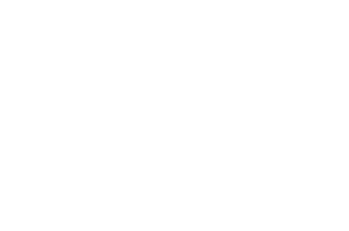

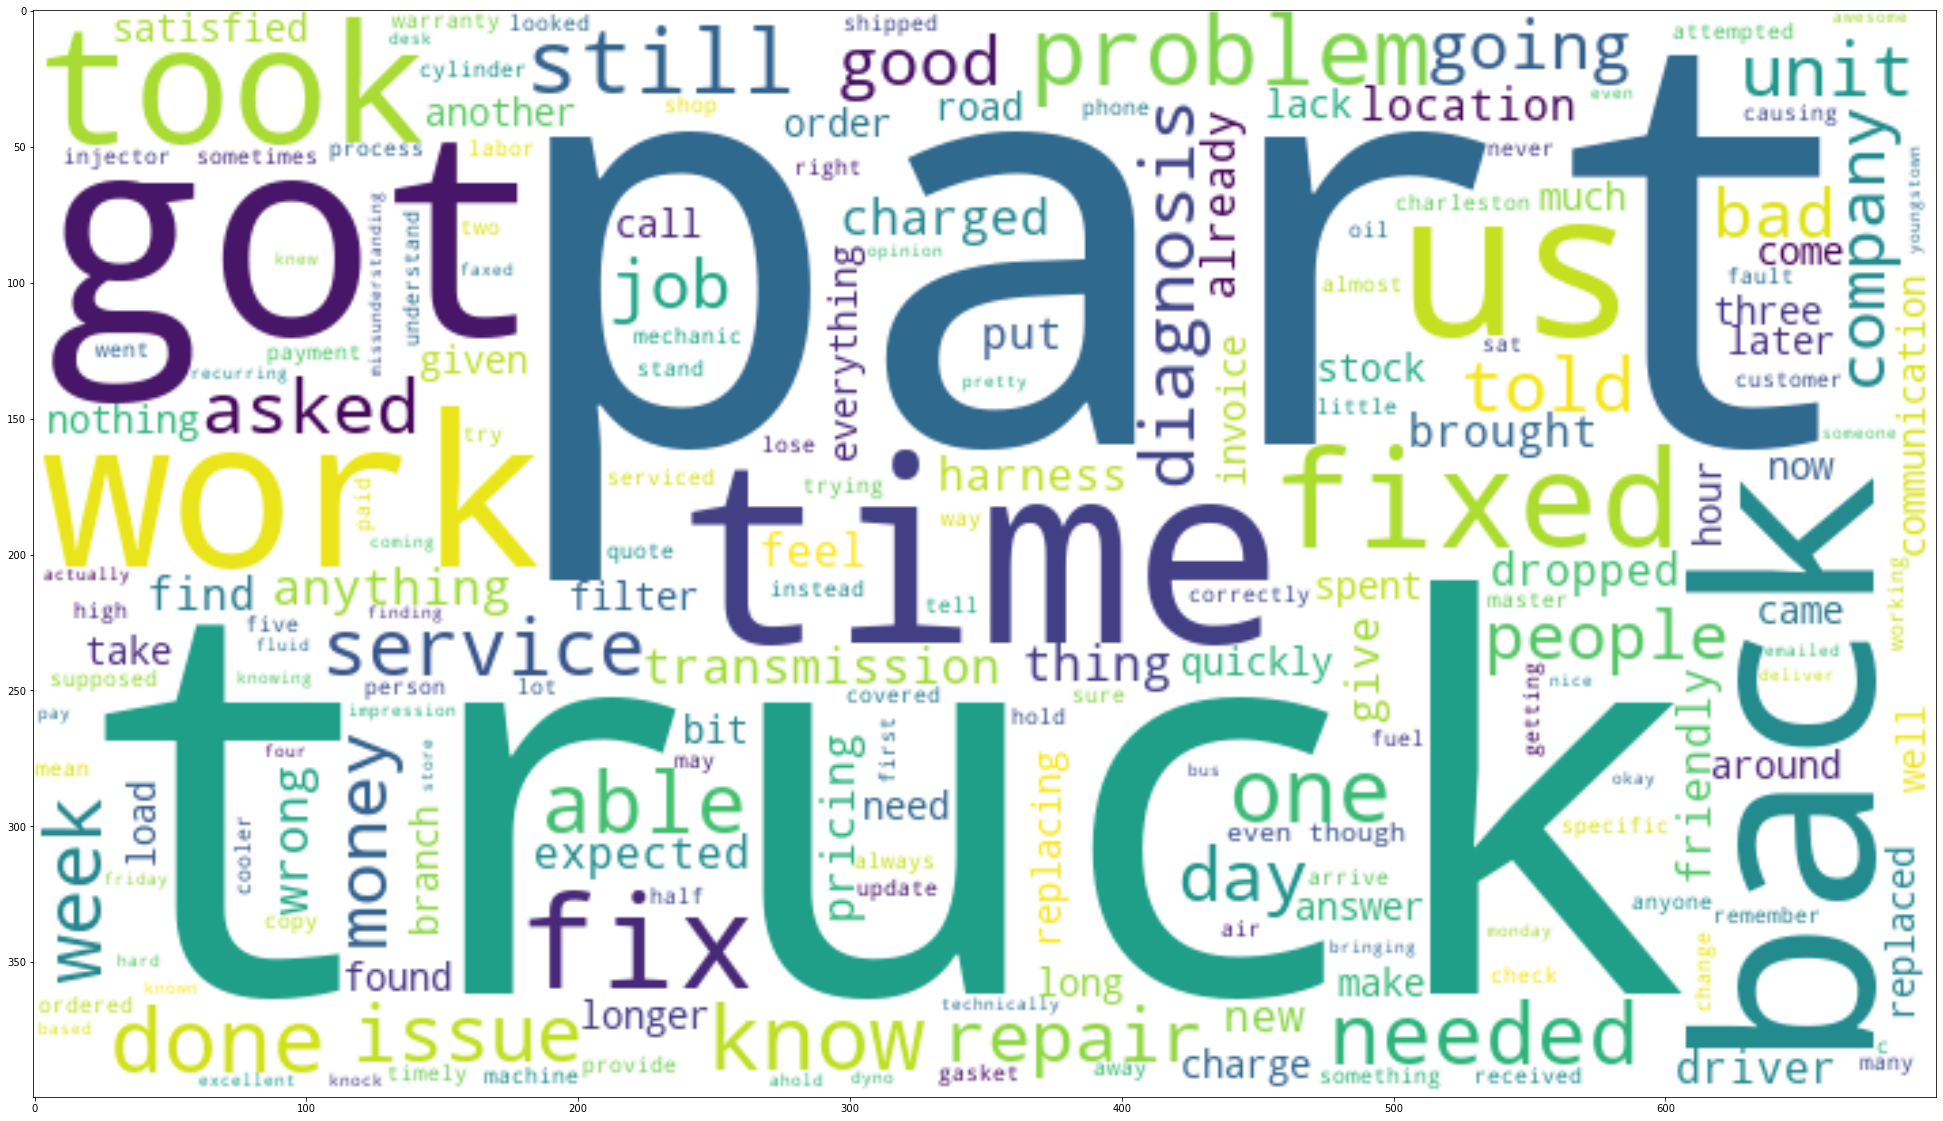

In [57]:
# Python program to generate WordCloud for column q7

# Text of all words in column bloom

text = " ".join(review for review in df_new['Can you give me a reason for giving a rating of {Q6a}?'])
print ("There are {} words in the combination of all cells in column q7.".format(len(text)))

# Create stopword list:
# remove words that we want to exclude

stopwords = ['said', 'called', 'go', 'na', '-'] + list(STOPWORDS)

# Generate a word cloud image

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=700, height=400).generate(text)

# Display the generated image:
# the matplotlib way:
plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [49]:
#Try VADER? Question: would the sentiment change while typing out the survey? leading to neutrality of statements? 

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

new_words = {
    'fixed': 4.0,
    'difficult': -3.4,
} 

SIA = SentimentIntensityAnalyzer()

SIA.lexicon.update(new_words)

#Add VADER metrics to dataframe column q7
df['compound'] = [SIA.polarity_scores(v)['compound'] for v in df_new['Can you give me a reason for giving a rating of {Q6a}?']]
df['neg'] = [SIA.polarity_scores(v)['neg'] for v in df_new['Can you give me a reason for giving a rating of {Q6a}?']]
df['neu'] = [SIA.polarity_scores(v)['neu'] for v in df_new['Can you give me a reason for giving a rating of {Q6a}?']]
df['pos'] = [SIA.polarity_scores(v)['pos'] for v in df_new['Can you give me a reason for giving a rating of {Q6a}?']]
df.head(10)

The published format which was employed  Remote case number  \
0                       Web: Snap WebHost                   1   
1                       Web: Snap WebHost                   2   
2                       Web: Snap WebHost                   3   
3                       Web: Snap WebHost                   4   
4                       Web: Snap WebHost                   5   
5                       Web: Snap WebHost                   6   
6                       Web: Snap WebHost                   7   
7                       Web: Snap WebHost                   8   
8                       Web: Snap WebHost                   9   
9                       Web: Snap WebHost                  10   

  Language used to conduct the interview  Duration of interview  \
0                          English (USA)                  31.02   
1                          English (USA)                  18.53   
2                          English (USA)                  13.05   
3                          English (USA)                   6.73   
4                          English (USA)                  24.07   
5                          English (USA)                  15.17   
6                          English (USA)                  12.50   
7                          English (USA)                   9.33   
8                          English (USA)                  12.93   
9                          English (USA)                  73.00   

  Remote station name Date of interview  URL ofcalling site      Location  \
0                 100        2021-04-01                 NaN  TUCSON (ASH)   
1                   8        2021-04-02                 NaN      COLUMBIA   
2                   7        2021-04-02                 NaN  GRAND RAPIDS   
3                   8        2021-04-02                 NaN      COLUMBIA   
4                   7        2021-04-02                 NaN  GRAND RAPIDS   
5                   8        2021-04-02                 NaN      COLUMBIA   
6                 Zoe        2021-04-02                 NaN    CLEVELAND    
7                 Zoe        2021-04-02                 NaN    CLEVELAND    
8                 Zoe        2021-04-02                 NaN         GREER   
9                   7        2021-04-02                 NaN       SAGINAW   

                   SEGMENT PARTS/ SERVICE  ...               Description  \
0  AUTO SAFETY HOUSE (ASH)          PARTS  ...              Not Provided   
1              ON-HIGHWAY         SERVICE  ...          On Highway Truck   
2              ON-HIGHWAY         SERVICE  ...  Highway Coach/Motor Home   
3              ON-HIGHWAY         SERVICE  ...          On Highway Truck   
4              ON-HIGHWAY         SERVICE  ...        Highway Dump Truck   
5              ON-HIGHWAY         SERVICE  ...  Highway Coach/Motor Home   
6              ON-HIGHWAY         SERVICE  ...          On Highway Truck   
7              ON-HIGHWAY         SERVICE  ...          On Highway Truck   
8              ON-HIGHWAY         SERVICE  ...   Bus,School Front Engine   
9              ON-HIGHWAY         SERVICE  ...          On Highway Truck   

  Other: (format: "code" - "Mfr Appl Description"; ex: ST21...  \
0                                                          NaN   
1                                                          NaN   
2                                                          NaN   
3                                                          NaN   
4                                                          NaN   
5                                                          NaN   
6                                                          NaN   
7                                                          NaN   
8                                                          NaN   
9                                                          NaN   

  Was this the right contact? (Did you reach the person who...  \
0                                                          Yes   
1   

In [50]:
df.shape

(673, 51)

In [52]:
df.to_excel('sentimentQ7.xls')

There are 25060 words in the combination of all cells in column q7.


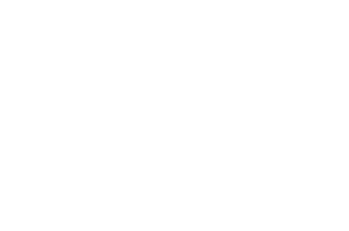

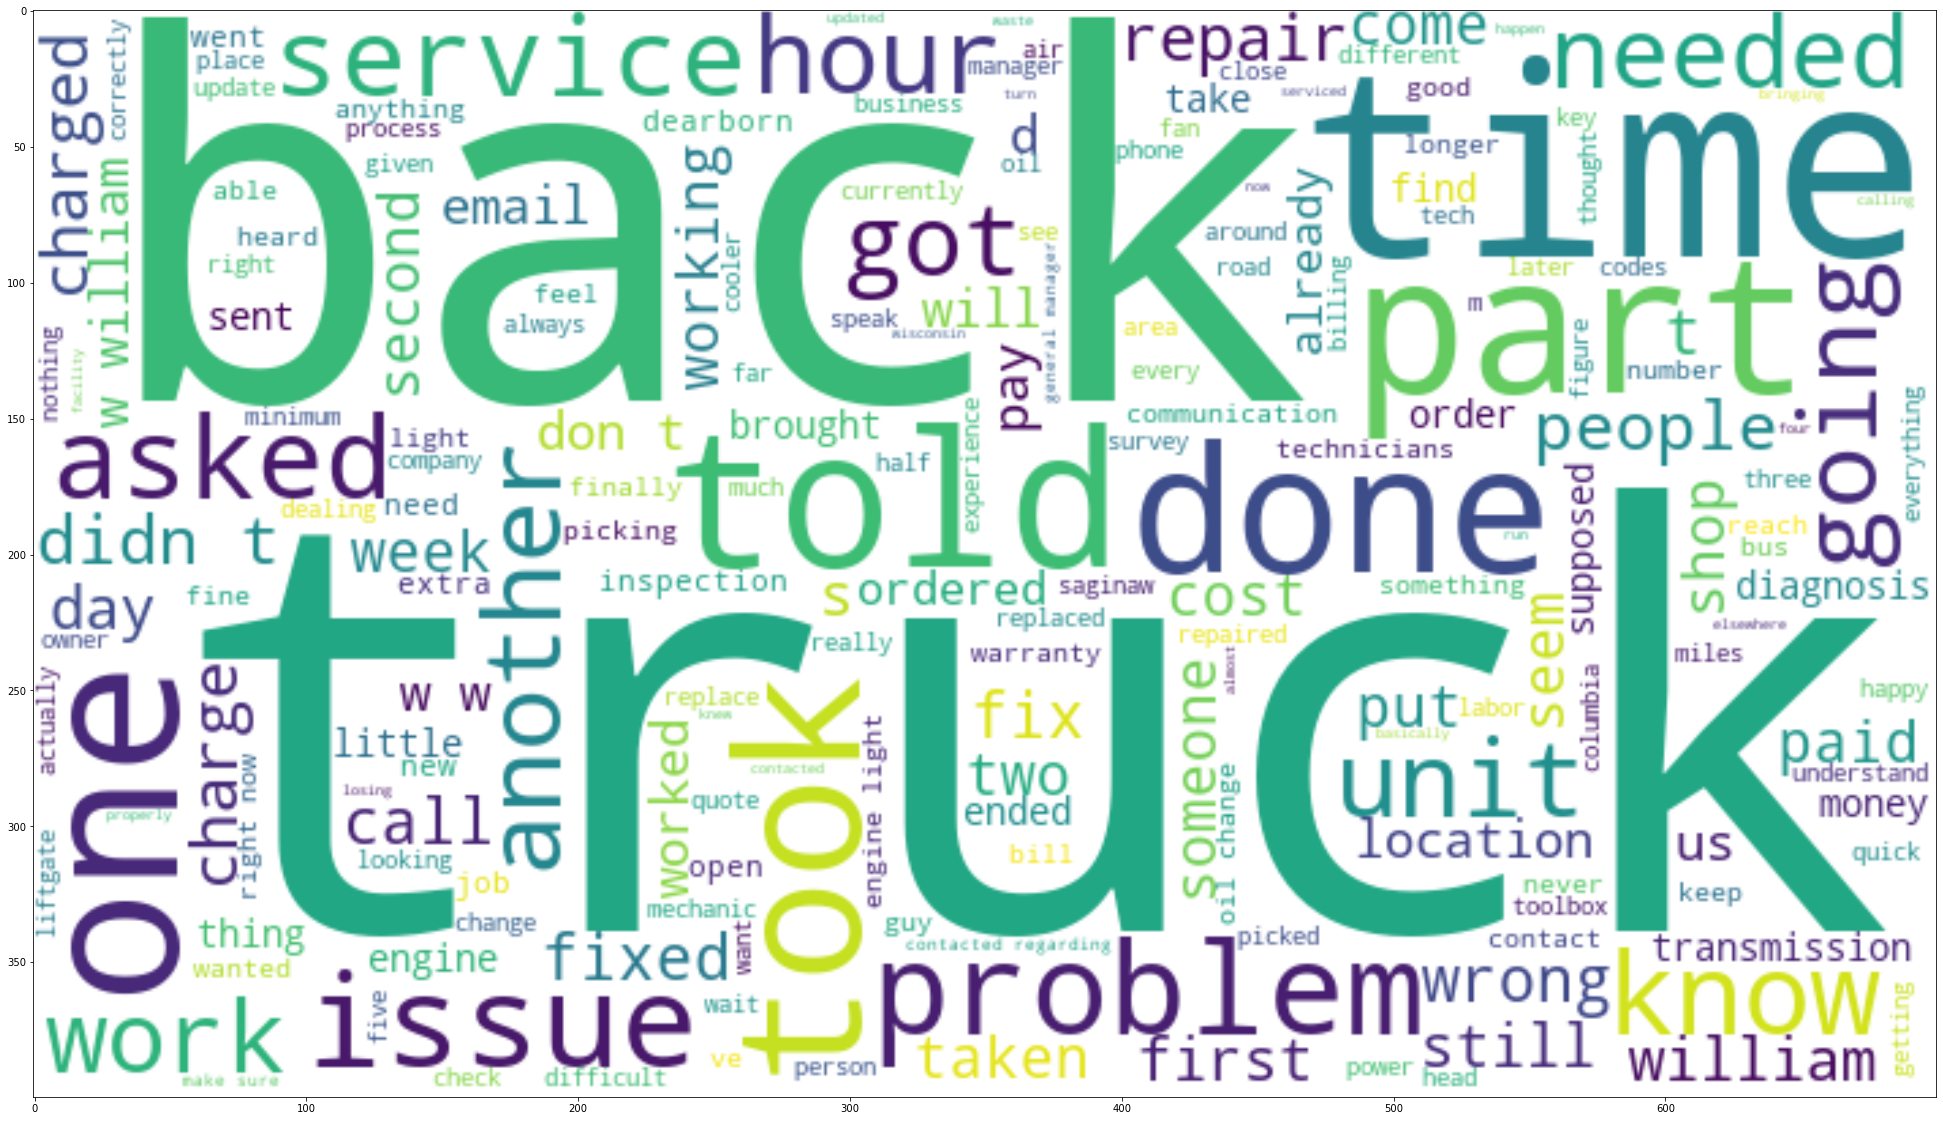

In [58]:
# Python program to generate WordCloud for column q9

# Text of all words in column bloom

text = " ".join(review for review in df_new['What was the nature of the problem?'])
print ("There are {} words in the combination of all cells in column q7.".format(len(text)))

# Create stopword list:
# remove words that we want to exclude
stopwords = ['said', 'called', 'go', 'na'] + list(STOPWORDS)

# Generate a word cloud image

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=700, height=400).generate(text)

# Display the generated image:
# the matplotlib way:
plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [19]:
#Add VADER metrics to dataframe column q9
df['compound'] = [analyzer.polarity_scores(v)['compound'] for v in df_new['What was the nature of the problem?']]
df['neg'] = [analyzer.polarity_scores(v)['neg'] for v in df_new['What was the nature of the problem?']]
df['neu'] = [analyzer.polarity_scores(v)['neu'] for v in df_new['What was the nature of the problem?']]
df['pos'] = [analyzer.polarity_scores(v)['pos'] for v in df_new['What was the nature of the problem?']]
df.head(10)
df.to_excel('sentimentQ9.xls')